<a href="https://colab.research.google.com/github/mdriad00/Capstone-Project/blob/main/Automatic_Pothole_and_Speed_Breaker_Detection_and_Alert_System_in_Bangladesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Mar 15 10:40:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/yolov8

/content/drive/MyDrive/Colab_Notebooks/yolov8


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/Colab_Notebooks/yolov8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


In [ ]:
%pwd

'/content/drive/MyDrive/Colab_Notebooks/yolov8'

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="YUimPAvrKnz2Jlb7X0WG")
project = rf.workspace("cse400b").project("cse400_pothole-and-speed-breaker-dataset")
dataset = project.version(6).download("yolov8")


mkdir: cannot create directory ‘/content/drive/MyDrive/Colab_Notebooks/yolov8/datasets’: File exists
/content/drive/MyDrive/Colab_Notebooks/yolov8/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to CSE400_Pothole-and-Speed-Breaker-Dataset-6 in yolov8:: 100%|██████████| 6015/6015 [28:31<00:00,  3.51it/s]


## Custom Training

In [ ]:
%cd {HOME}

/content/drive/MyDrive/Colab_Notebooks/yolov8


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True

/content/drive/MyDrive/Colab_Notebooks/yolov8
100% 21.5M/21.5M [00:02<00:00, 9.11MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Colab_Notebooks/yolov8/datasets/CSE400_Pothole-and-Speed-Breaker-Dataset-6/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augme

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch14041.jpg
confusion_matrix.png				    train_batch14042.jpg
events.out.tfevents.1678877252.7e03d7468131.3199.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch14040.jpg				    weights


/content/drive/MyDrive/Colab_Notebooks/yolov8


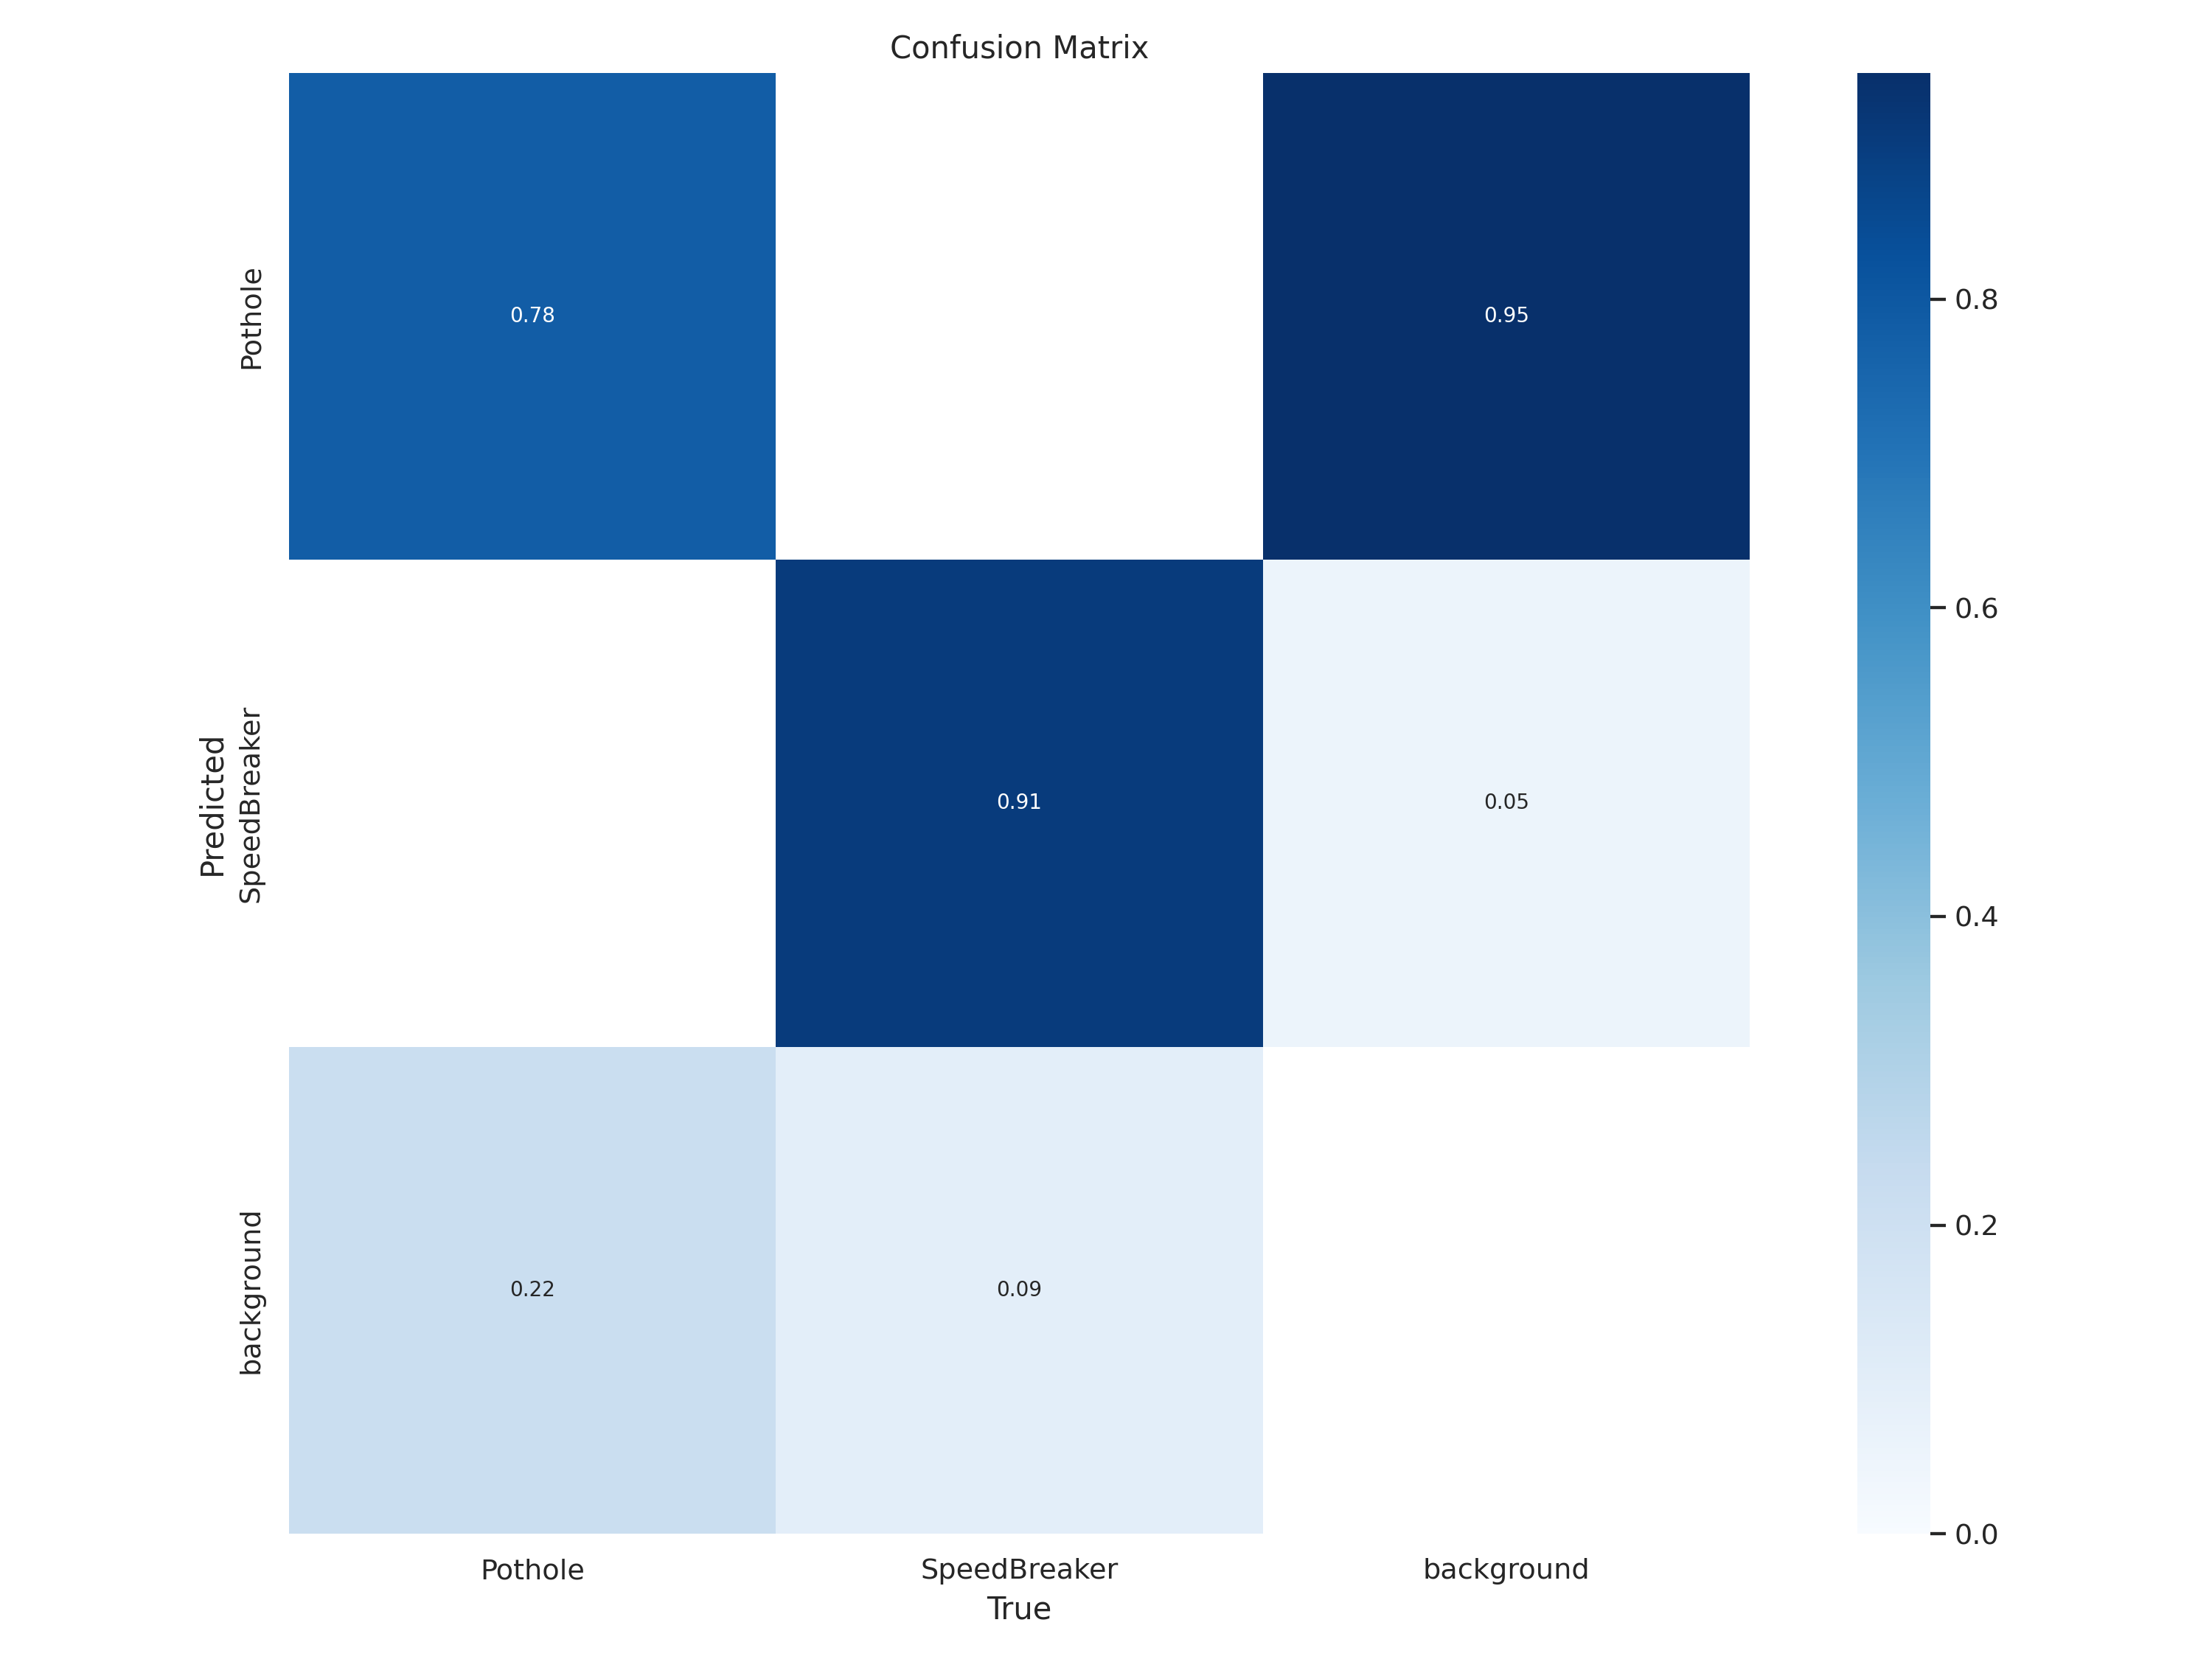

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/Colab_Notebooks/yolov8


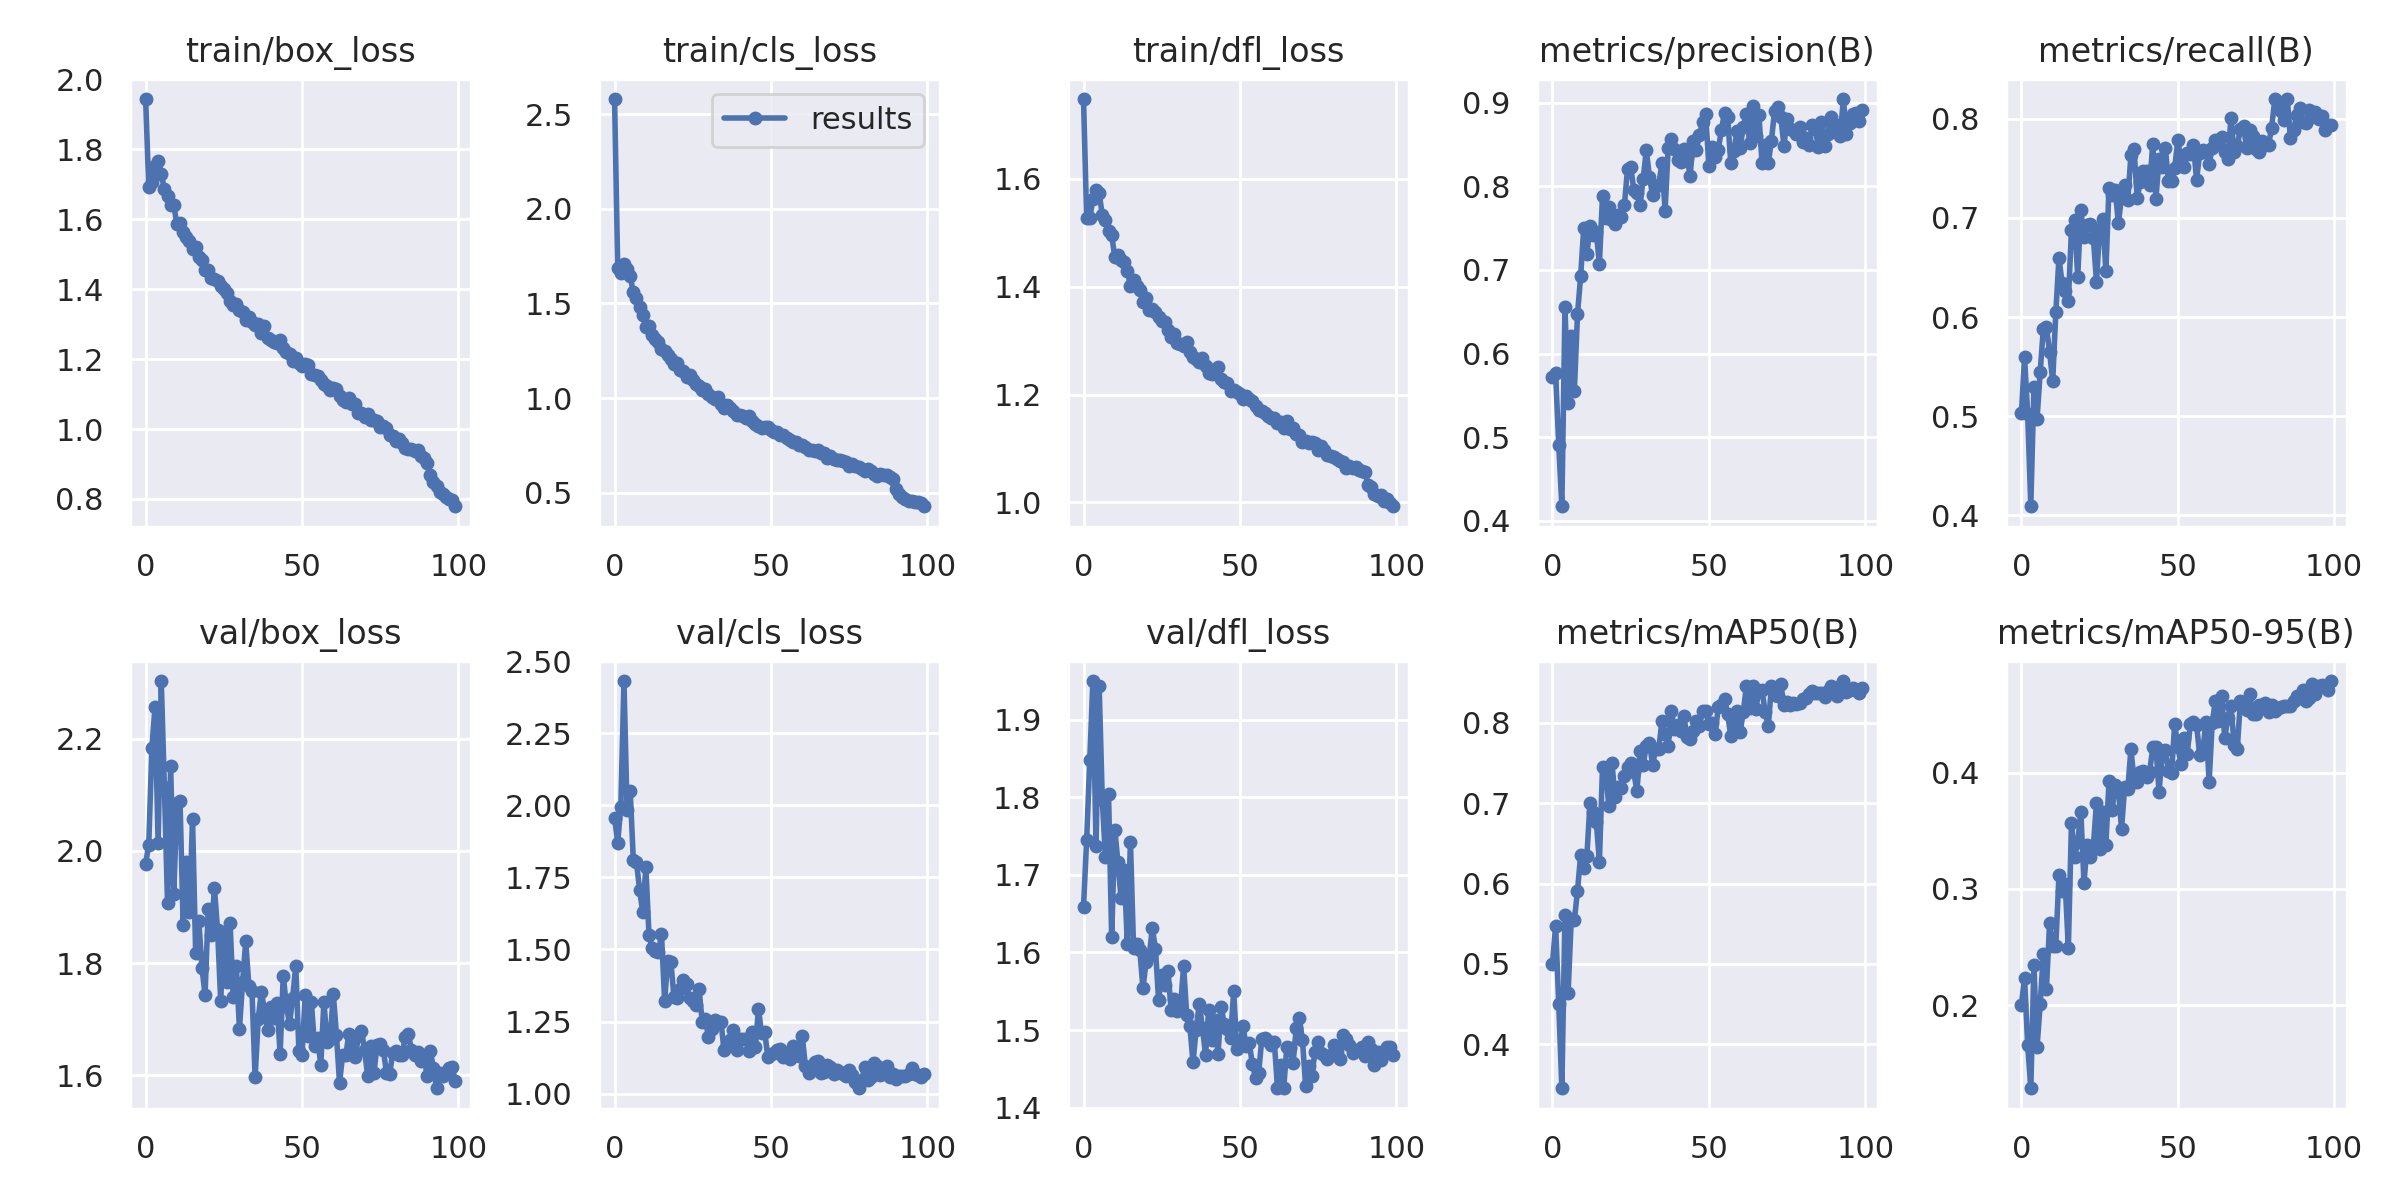

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/Colab_Notebooks/yolov8


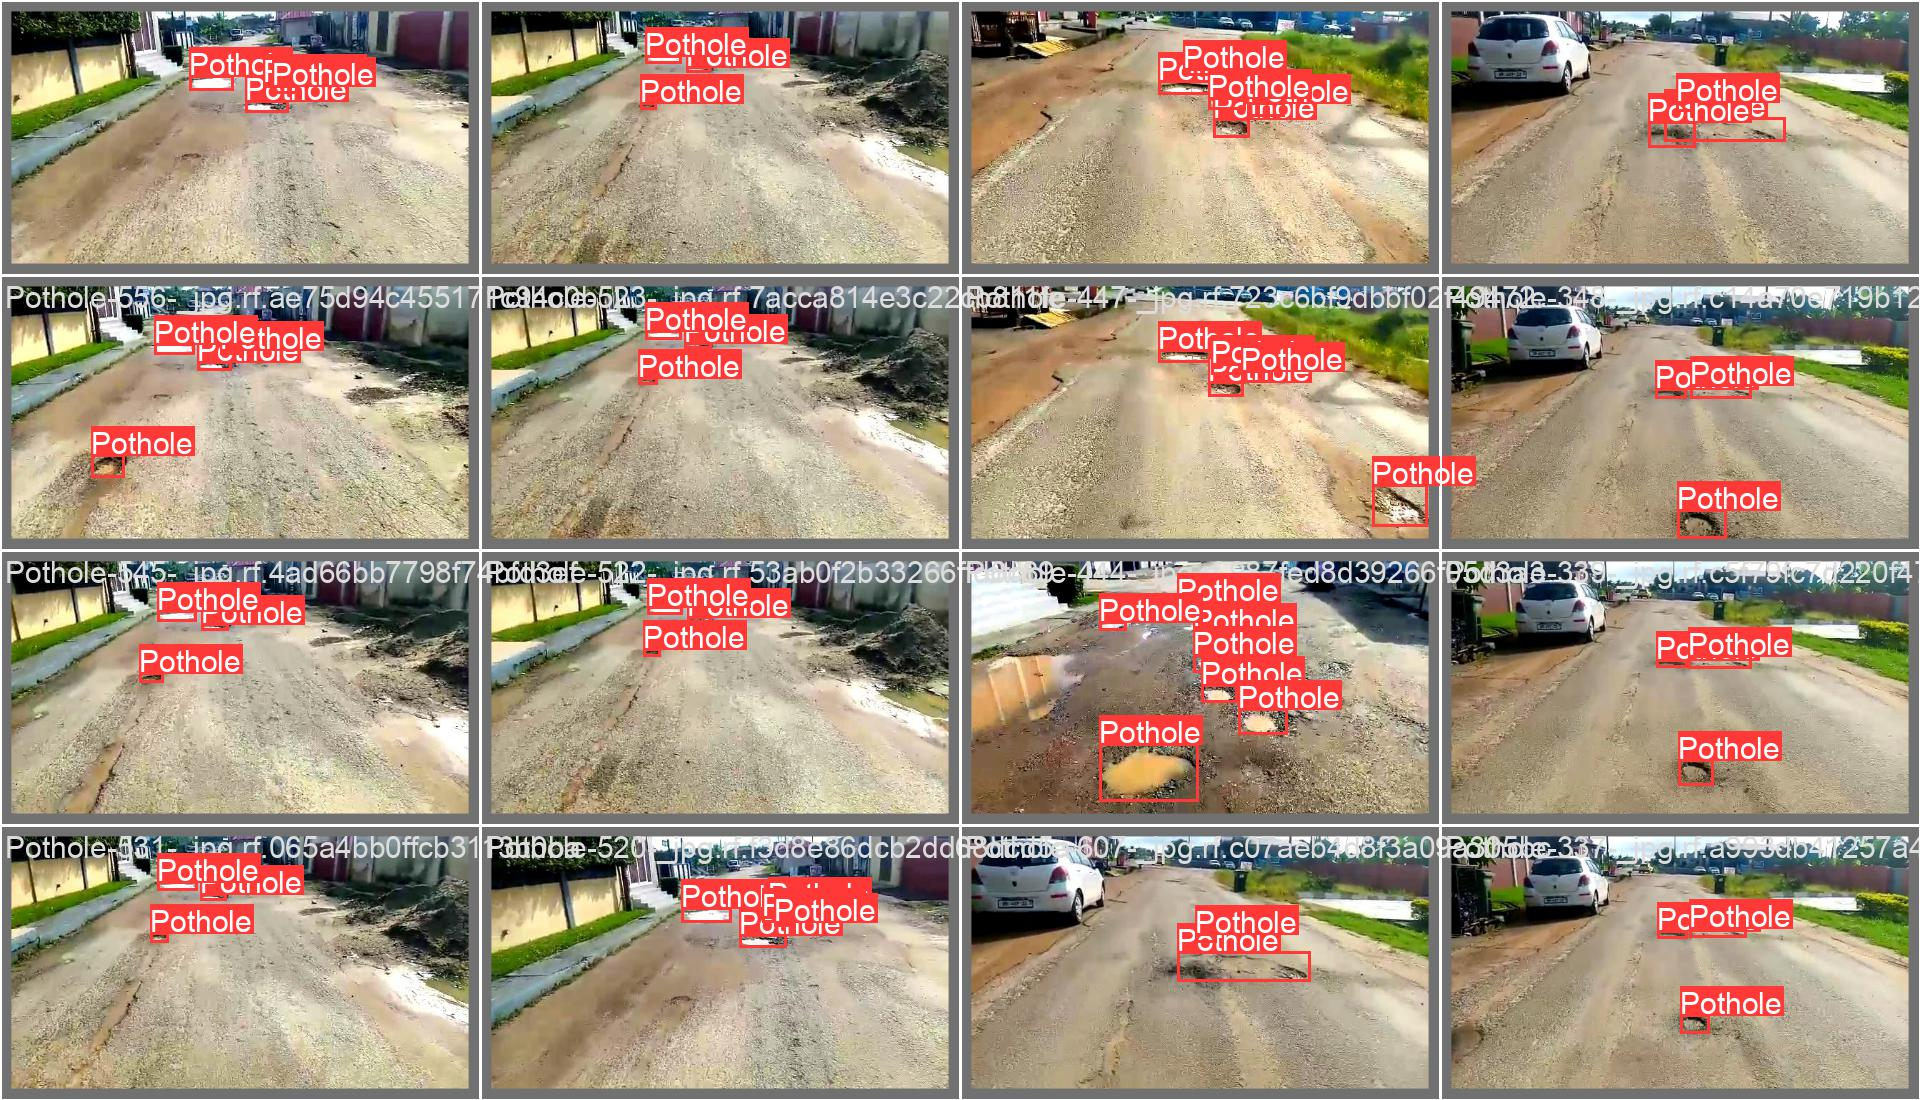

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_labels.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/Colab_Notebooks/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 24.5MB/s]
val: Scanning /content/drive/MyDrive/Colab_Notebooks/yolov8/datasets/CSE400_Pothole-and-Speed-Breaker-Dataset-6/valid/labels.cache... 514 images, 0 backgrounds, 0 corrupt: 100% 514/514 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [00:15<00:00,  2.14it/s]
                   all        514       1276      0.887      0.793      0.842      0.478
               Pothole        514       1139      0.874      0.725      0.801      0.454
          SpeedBreaker        514        137        0.9      0.861      0.883      0.501
Speed: 0.8ms pre-process, 8.1ms inference, 0.0ms loss, 2.6ms post-process per image


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

/content/drive/MyDrive/Colab_Notebooks/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/514 /content/drive/MyDrive/Colab_Notebooks/yolov8/datasets/CSE400_Pothole-and-Speed-Breaker-Dataset-6/valid/images/Pothole-1004-_jpg.rf.6d93637c0b4323ceecb15ebcb23f90c0.jpg: 640x640 1 Pothole, 17.1ms
image 2/514 /content/drive/MyDrive/Colab_Notebooks/yolov8/datasets/CSE400_Pothole-and-Speed-Breaker-Dataset-6/valid/images/Pothole-1039-_jpg.rf.b9f1754250501fe32cd799b85ea4ced0.jpg: 640x640 1 Pothole, 17.1ms
image 3/514 /content/drive/MyDrive/Colab_Notebooks/yolov8/datasets/CSE400_Pothole-and-Speed-Breaker-Dataset-6/valid/images/Pothole-1050-_jpg.rf.f0d7955db3109a865c017bbec84936ad.jpg: 640x640 2 Potholes, 17.1ms
image 4/514 /content/drive/MyDrive/Colab_Notebooks/yolov8/datasets/CSE400_Pothole-and-Speed-Breaker-Dataset-6/valid/images/Pothole-1082-_jpg.rf.a415d89a1c52d2d01

**NOTE:** Let's take a look at few results.

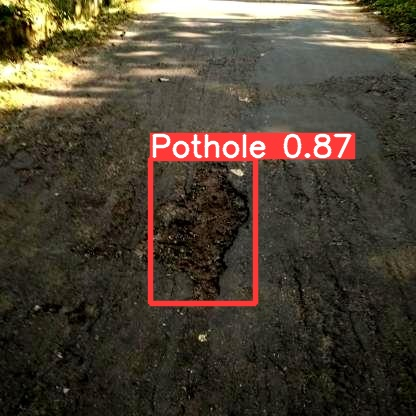

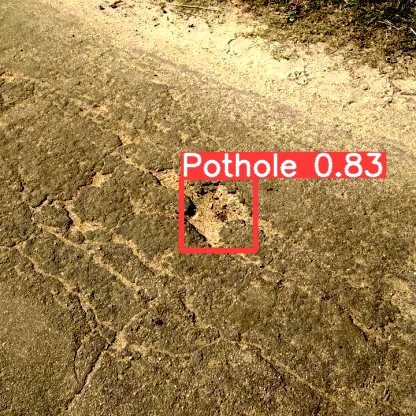

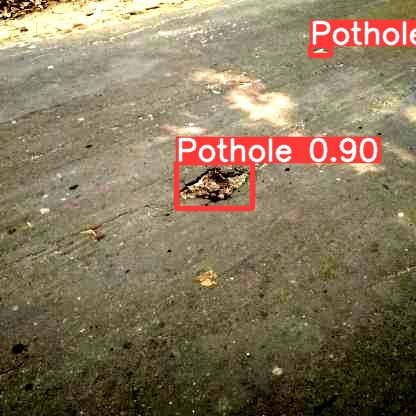

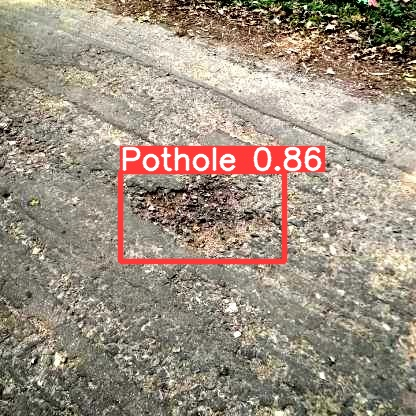

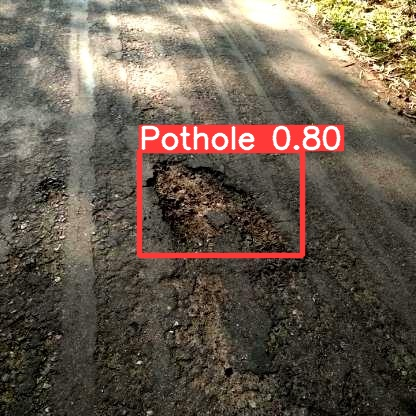

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import files
import os

dir_to_zip = '/content/drive/MyDrive/Colab_Notebooks/yolov8/runs/detect'
output_filename = 'new.zip' 
delete_dir_after_download = "No"  

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )

files.download( output_filename )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

from ultralytics.yolo.v8.detect.predict import DetectionPredictor
import cv2

model = YOLO("yolov8s.pt")

results = model.predict(source="0", show=True)

print(results)